Andrew Koren

Sec 007

Research Question: Is my girlfriend and I's spending sustainable, will I be able to pay for tuition next semester?

My dataset is our bank statements

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap


In [40]:
##read and sort
fifththird = pd.read_csv('53.csv')
private = pd.read_csv('private.csv')
shared = pd.read_csv('shared.csv')

#shared.head()
#print(shared.keys())

shared['Description'] = shared.iloc[:,1].str.extract(r'Category:\s*(\w+)')
private['Description'] = private.iloc[:,1].str.extract(r'Category:\s*(\w+)')

shared = shared.dropna(subset='Description')
shared =  shared.iloc[:,:4]
private = private.dropna(subset='Description')
private = private.iloc[:,:4]

sshared = shared.sort_values(by='Description')
sprivate = private.sort_values(by='Description')

fifththird.keys()

fifththird['Type'], fifththird['Description'] = fifththird['Description'], fifththird['Type']
sfifththird = fifththird.dropna(subset='Description').sort_values(by='Description')
sfifththird.drop('Type',axis=1,inplace=True)

In [41]:
##combine and rename categories
expenses = pd.concat([sfifththird, sshared, sprivate], axis=0)
expenses = expenses.sort_values('Description').drop('Balance',axis=1)
keys = expenses['Description'].unique()
#print(keys,len(keys))

newkeys = ['Automotive', 'Entertainment / Dining', 'Entertainment / Dining',
 'Entertainment / Dining', 'Groceries', 'Health', 'Household / Utilities',
 'Household / Utilities', 'School', 'Shopping', 'Automotive', 'NaN']
#print(newkeys,len(newkeys))

for i in range(len(keys)):
    mask = expenses['Description'] == keys[i]
    expenses.loc[mask, 'Description'] = newkeys[i]

expenses = expenses.dropna(subset='Description')


In [42]:
##stuff to prepare for plotting
expenses['Date']=pd.to_datetime(expenses['Date'])
expenses['int']=(expenses['Date'] - pd.Timestamp('2023-10-01')).dt.days
expenses = expenses[expenses['Amount']<=0]

expenses_per_day = expenses.groupby('Date')['Amount'].sum().reset_index()
expense_dates = (expenses_per_day['Date'] - pd.Timestamp('2023-10-01')).dt.days

expenses.head()


,Date,Description,Amount,int
4,2023-11-02,Automotive,-16.22,32
11,2023-10-30,Automotive,-44.41,29
6,2023-11-01,Automotive,-14.50,31
3,2023-11-02,Entertainment / Dining,-23.30,32
5,2023-11-01,Entertainment / Dining,-2.29,31


In [43]:
##Totaling expenses loop
total_expenses = []
debit = 0

for i in range(len(expense_dates)):
    debit += expenses_per_day['Amount'][i]
    total_expenses.append(debit)


expenses['Date'].max()

Timestamp('2023-11-03 00:00:00')

In [47]:
expense_dates.to_list()[-1]

33

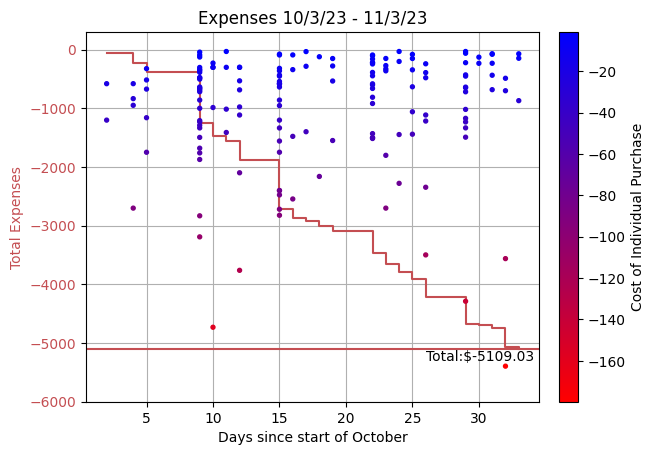

In [68]:
cmap_custom = LinearSegmentedColormap.from_list(
    'custom_coolwarm', ['red', 'blue'])

sns.reset_defaults()

#y_normalized =  (expenses['Amount'] - expenses['Amount'].min()) / (expenses['Amount'].max() - expenses['Amount'].min())
fig, ax1 = plt.subplots()

#ax1.bar(expense_dates,expenses_per_day['Amount'],color='red')
ax1.set_xlabel('Days since start of October')
ax1.set_ylabel('Total Expenses', color='r')
ax1.tick_params(axis='y', labelcolor='r')
ax1.set_ylim(-6000,300)

ax2=ax1.twinx()
ax2.axis('off')
sc1 = ax2.scatter(expenses['int'],expenses['Amount'],c=expenses['Amount'], cmap=cmap_custom,s=8)
#ax2.set_ylabel('Purchase Value', color='b')
#ax2.tick_params(axis='y', labelcolor='b')
ax2.set_ylim(-200,10)
ax1.grid()
cbar = plt.colorbar(sc1, ax=ax2, fraction=0.046, pad=0.04)
cbar.set_label('Cost of Individual Purchase')
#
ax1.step(expense_dates,total_expenses,where='post',color='r')
ax1.axhline(total_expenses[-1],color='r')
ax1.text(expense_dates.to_list()[-1]-7,total_expenses[-1]-200,f'Total:${total_expenses[-1]}')
#plt.xlabel('Days Since October 1st')
plt.title('Expenses 10/3/23 - 11/3/23')
plt.show()


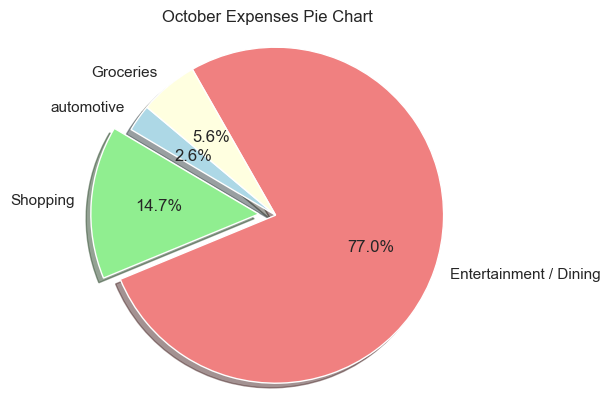

In [ ]:
automotive_fees = expenses[expenses['Description']=='Automotive']
shopping_fees = expenses[expenses['Description']=='Shopping']
fun_fees = expenses[expenses['Description']=='Entertainment / Dining']
grocery_fees = expenses[expenses['Description']=='Groceries']


# Create data
labels = ['automotive', 'Shopping', 'Entertainment / Dining', 'Groceries']
sizes = [abs(automotive_fees['Amount'].sum()), abs(shopping_fees['Amount'].sum()), abs(fun_fees['Amount'].sum()), abs(grocery_fees['Amount'].sum())]
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow']
explode = (0, 0.1, 0, 0)  # Explode the first slice (Category 1)

# Create a pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

# Add a title
plt.title('October Expenses Pie Chart')

# Display the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()


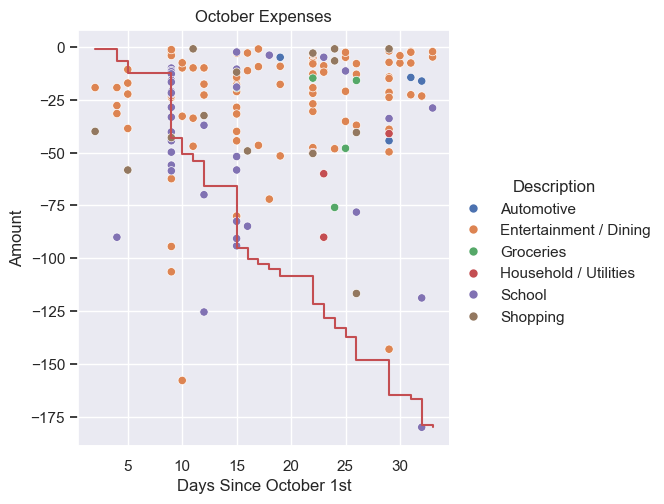

In [ ]:
#plt.figure(figsize=(15,60))

sns.set_theme(style='darkgrid')

sns.relplot(x=expenses['int'],y=expenses['Amount'], hue='Description', data=expenses)#,legend=False)
plt.xlabel('Days Since October 1st')

ax2 = plt.gca().twinx()
ax2.set_yticks([])  # Hide the ticks
ax2.set_yticklabels([])  # Hide the tick labels
ax2.spines['right'].set_visible(False)  # Hide the right spine
ax2.spines['left'].set_visible(False)   # Hide the left spine
#plt.tight_layout()
#handles, labels = plt.gca().get_legend_handles_labels()
#plt.legend(handles=handles, labels=labels, loc='upper right')

plt.step(expense_dates,total_expenses,where='post',color='r')

plt.title('October Expenses')
plt.show()
